In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("income.csv")
df

,Name,age,income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


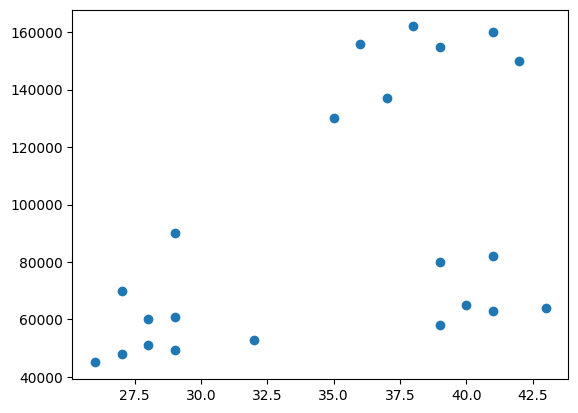

In [3]:
plt.scatter(df['age'],df['income'])

In [4]:
km=KMeans(n_clusters=3)

In [5]:
y_predicted=km.fit_predict(df[['age','income']])
y_predicted


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [6]:
df['cluster']=y_predicted # adding the clusters into the dataframe
df

,Name,age,income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


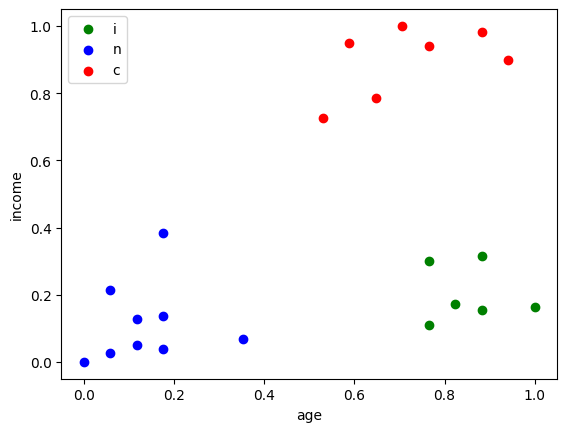

In [22]:
df1=df[df.cluster==0] # separting these 3 clusterrs into 3 dtatframes
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.age,df1['income'],color='green') # plotting 3 df into same scatter plots
plt.scatter(df2.age,df2['income'],color='blue')
plt.scatter(df3.age,df3['income'],color='red')

plt.xlabel('age')
plt.ylabel('income')
plt.legend("income")

# clustering is not perfectly done

In [24]:
# to fit cluster properply ,we will use minmax scaler to fit the data points properly
scaler=MinMaxScaler() # it will scale down the data between 0 to 1
scaler.fit(df[['income']])
df[['income']]=scaler.transform(df[['income']])


scaler.fit(df[['age']])
df[['age']]=scaler.transform(df[['age']])
df

,Name,age,income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [25]:
# trainig the algo with scalled datasets
km=KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['age','income']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [10]:
df["cluster"]=y_predicted
df

,Name,age,income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [11]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

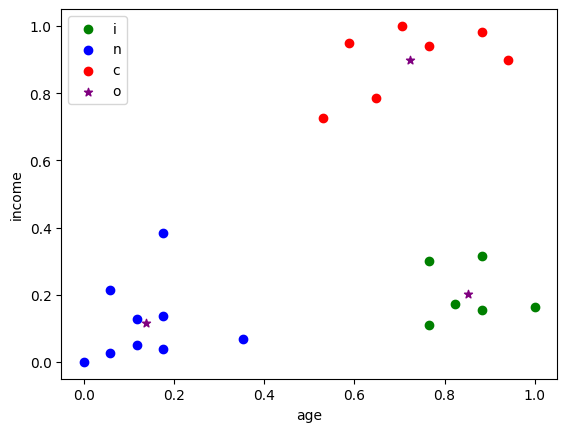

In [27]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.age,df1['income'],color='green')
plt.scatter(df2.age,df2['income'],color='blue')
plt.scatter(df3.age,df3['income'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label="centroid") # for plotting the centroids on the scatter plot 

plt.xlabel('age')
plt.ylabel('income')
plt.legend('income')

In [13]:
# using elbow plot method:-
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['age','income']])
    sse.append(km.inertia_)
    

In [14]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.39237665288019463,
 0.27558255687229766,
 0.22624835214667532,
 0.18275153026579993,
 0.17287387274892083,
 0.1700141691823885]

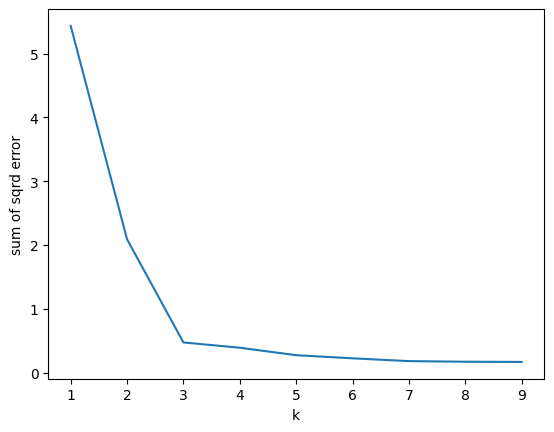

In [15]:
plt.xlabel('k')
plt.ylabel("sum of sqrd error")
plt.plot(k_rng,sse)